In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt




In [21]:
# Directories
empty_dir = "project-cv\\parking-lot\\parking\\clf-data\\empty"
not_empty_dir = "project-cv\\parking-lot\\parking\\clf-data\\not_empty"

# List images
empty_images = [os.path.join(empty_dir, img) for img in os.listdir(empty_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
not_empty_images = [os.path.join(not_empty_dir, img) for img in os.listdir(not_empty_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Number of images in each category
print(f"Number of empty parking lot images: {len(empty_images)}")
print(f"Number of parking lot images with cars: {len(not_empty_images)}")

# Load a few sample images from each category
sample_empty = [Image.open(img) for img in empty_images[:5]]
sample_not_empty = [Image.open(img) for img in not_empty_images[:5]]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'project-cv\\parking-lot\\parking\\clf-data\\empty'

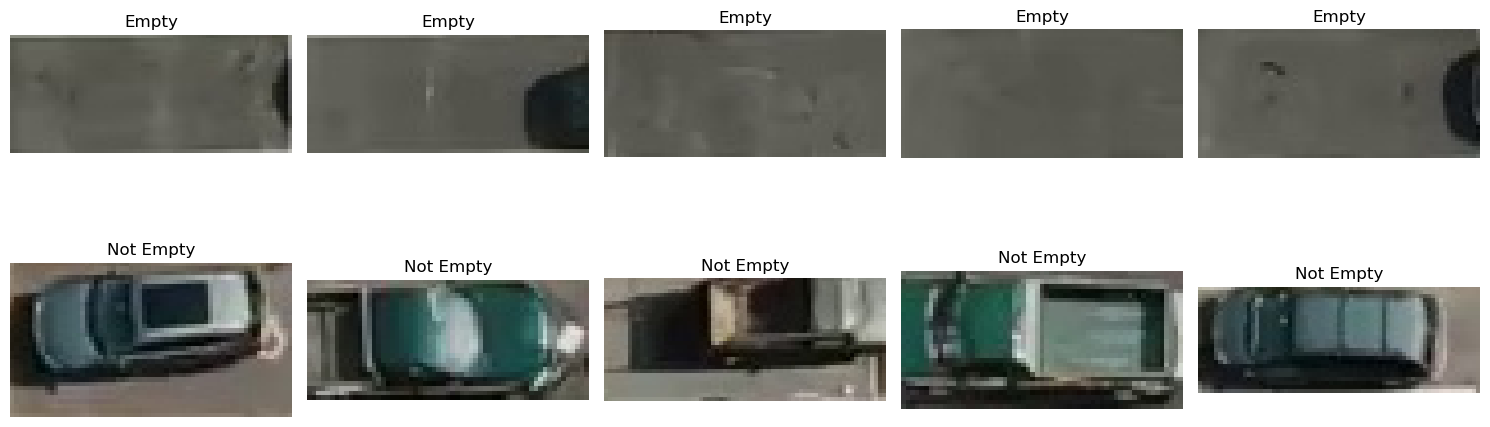

Empty images dimensions: [(69, 29), (69, 29), (69, 31), (68, 31), (68, 31)]
Not empty images dimensions: [(64, 35), (61, 26), (71, 31), (61, 30), (69, 26)]


In [4]:
# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(sample_empty):
    axes[0, i].imshow(img)
    axes[0, i].set_title("Empty")
    axes[0, i].axis("off")

for i, img in enumerate(sample_not_empty):
    axes[1, i].imshow(img)
    axes[1, i].set_title("Not Empty")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# Analyze image dimensions
empty_dims = [img.size for img in sample_empty]
not_empty_dims = [img.size for img in sample_not_empty]

print(f"Empty images dimensions: {empty_dims}")
print(f"Not empty images dimensions: {not_empty_dims}")


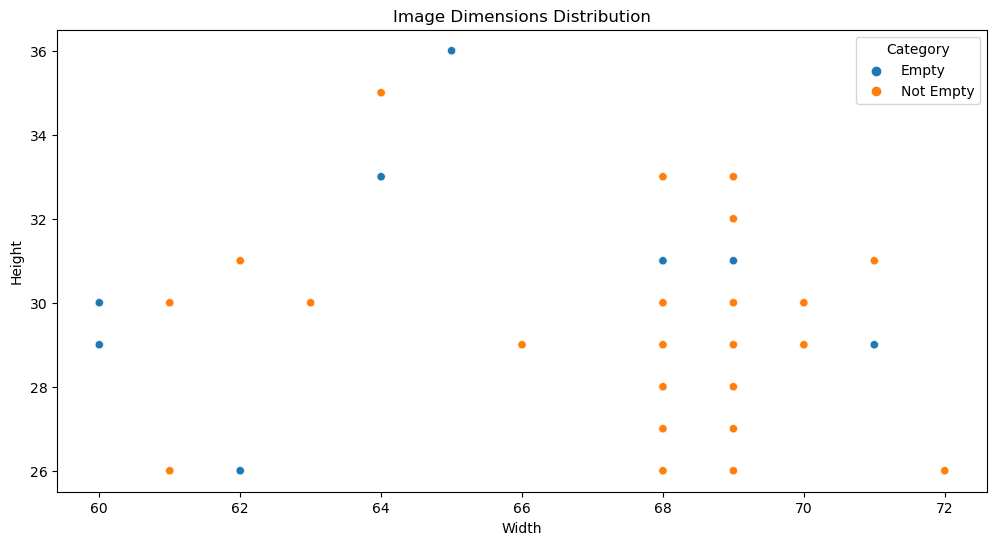

In [5]:
import seaborn as sns

# Get dimensions of all images
empty_dims = [Image.open(img).size for img in empty_images]
not_empty_dims = [Image.open(img).size for img in not_empty_images]

# Separate width and height
empty_widths, empty_heights = zip(*empty_dims)
not_empty_widths, not_empty_heights = zip(*not_empty_dims)

# Create a DataFrame for visualization
import pandas as pd

data = pd.DataFrame({
    "Width": empty_widths + not_empty_widths,
    "Height": empty_heights + not_empty_heights,
    "Category": ["Empty"] * len(empty_widths) + ["Not Empty"] * len(not_empty_widths)
})

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="Width", y="Height", hue="Category")
plt.title("Image Dimensions Distribution")
plt.show()


In [6]:
import numpy as np

# Function to compute statistics
def compute_statistics(images):
    means = []
    stds = []
    for img in images:
        img_array = np.array(img)
        means.append(img_array.mean())
        stds.append(img_array.std())
    return np.mean(means), np.mean(stds), np.std(means), np.std(stds)

# Compute statistics for each category
empty_stats = compute_statistics(sample_empty)
not_empty_stats = compute_statistics(sample_not_empty)

print(f"Empty images - Mean: {empty_stats[0]:.2f}, Std: {empty_stats[1]:.2f}")
print(f"Not empty images - Mean: {not_empty_stats[0]:.2f}, Std: {not_empty_stats[1]:.2f}")


Empty images - Mean: 85.31, Std: 13.27
Not empty images - Mean: 81.51, Std: 47.38


In [7]:
from PIL import ImageOps

# Convert images to grayscale
def load_and_convert_images(image_paths):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        gray_img = ImageOps.grayscale(img)
        images.append(gray_img)
    return images

# Load and convert images
empty_images_gray = load_and_convert_images(empty_images)
not_empty_images_gray = load_and_convert_images(not_empty_images)


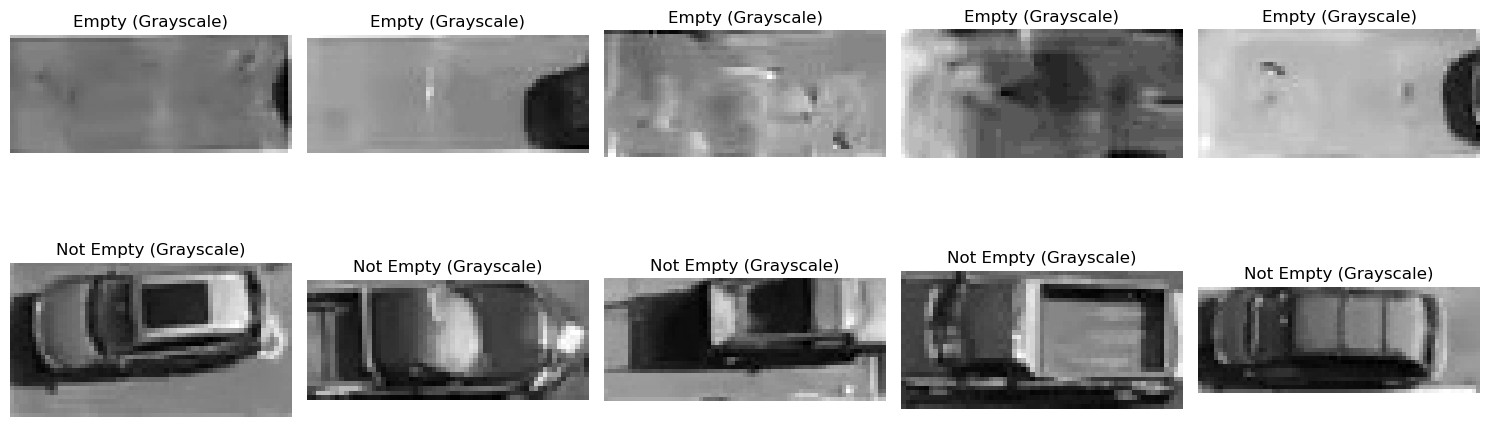

In [8]:
# Plot sample grayscale images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(empty_images_gray[:5]):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Empty (Grayscale)")
    axes[0, i].axis("off")

for i, img in enumerate(not_empty_images_gray[:5]):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Not Empty (Grayscale)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


In [36]:
empty_dims_gray = [img.size for img in empty_images_gray]
not_empty_dims_gray = [img.size for img in not_empty_images_gray]




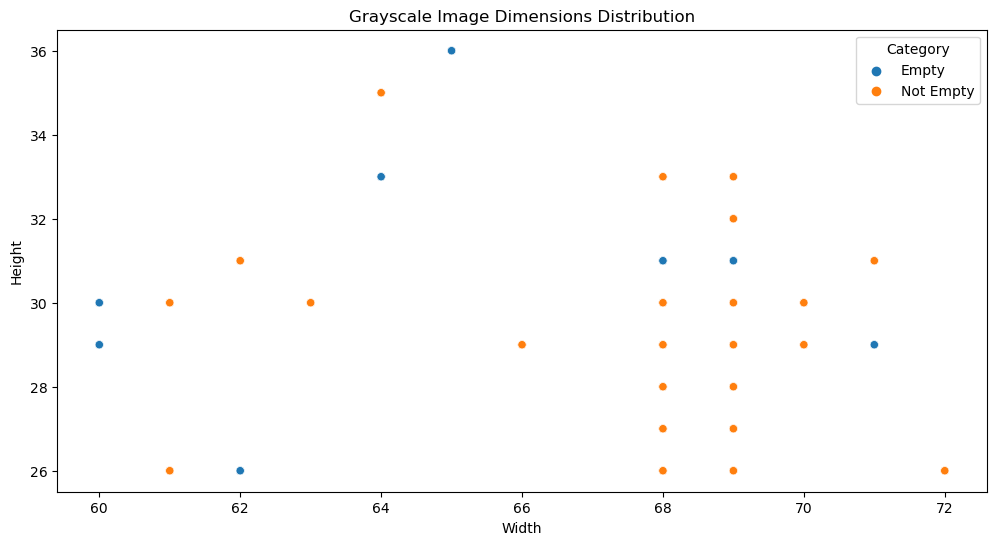

In [11]:
# Get dimensions of all grayscale images
empty_widths_gray, empty_heights_gray = zip(*empty_dims_gray)
not_empty_widths_gray, not_empty_heights_gray = zip(*not_empty_dims_gray)

# Create a DataFrame for visualization
data_gray = pd.DataFrame({
    "Width": empty_widths_gray + not_empty_widths_gray,
    "Height": empty_heights_gray + not_empty_heights_gray,
    "Category": ["Empty"] * len(empty_widths_gray) + ["Not Empty"] * len(not_empty_widths_gray)
})

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_gray, x="Width", y="Height", hue="Category")
plt.title("Grayscale Image Dimensions Distribution")
plt.show()


In [15]:
# Combine pixel values for all images in each category
empty_pixels = np.concatenate([np.array(img).ravel() for img in empty_images_gray])
not_empty_pixels = np.concatenate([np.array(img).ravel() for img in not_empty_images_gray])




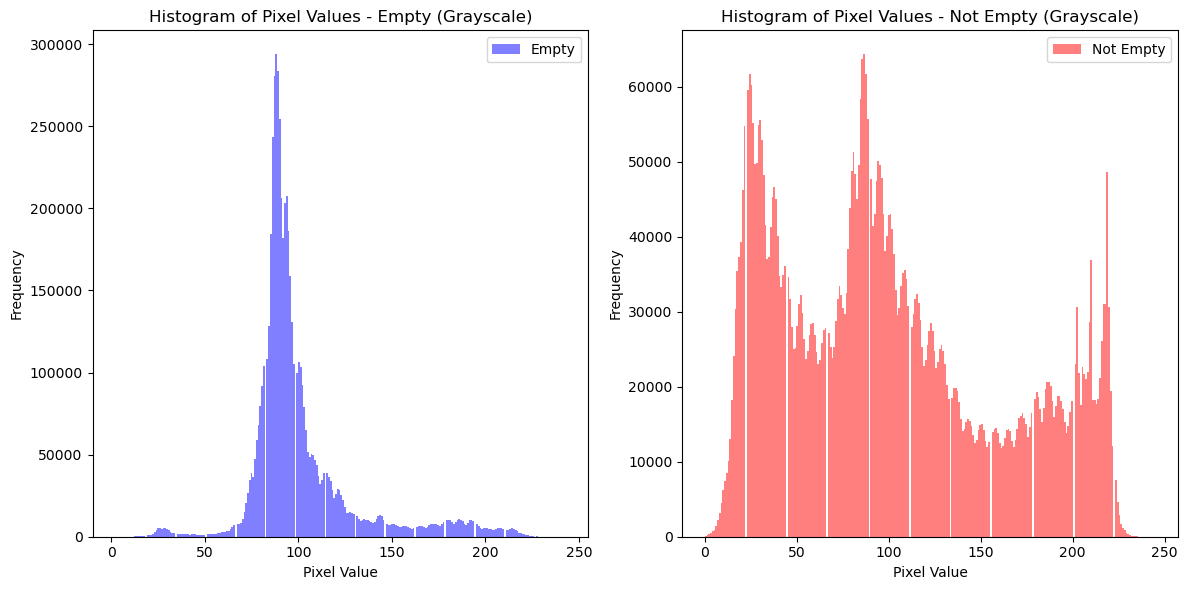

In [16]:
# Plot histograms of pixel values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(empty_pixels, bins=256, color='blue', alpha=0.5, label='Empty')
plt.title("Histogram of Pixel Values - Empty (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_empty_pixels, bins=256, color='red', alpha=0.5, label='Not Empty')
plt.title("Histogram of Pixel Values - Not Empty (Grayscale)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

Smoothing and Edge Detection


In [26]:
# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(image, sigma=1):
    return filters.gaussian(image, sigma=sigma)

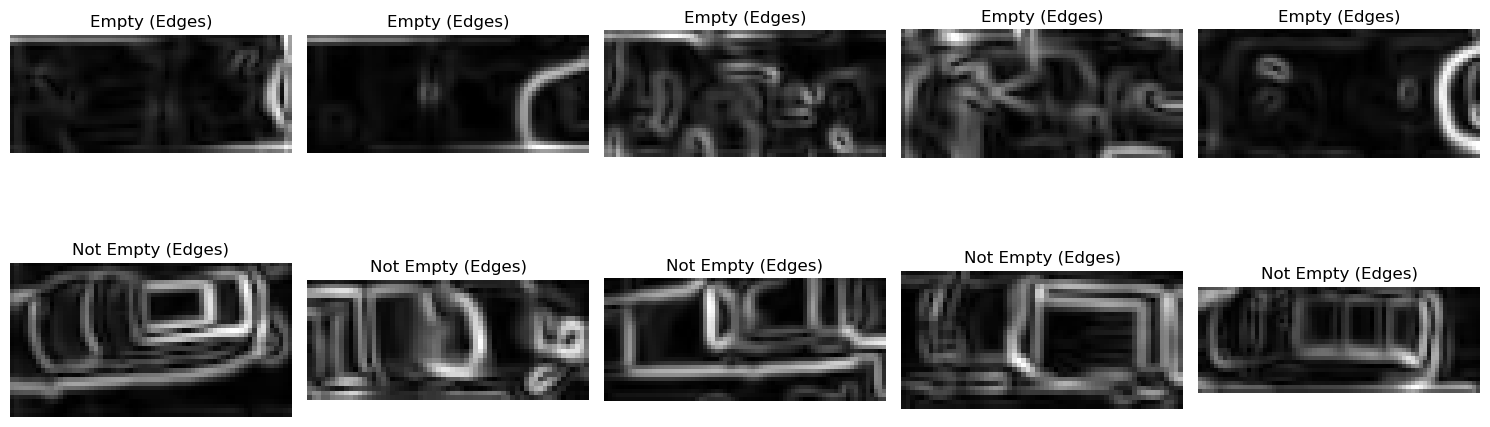

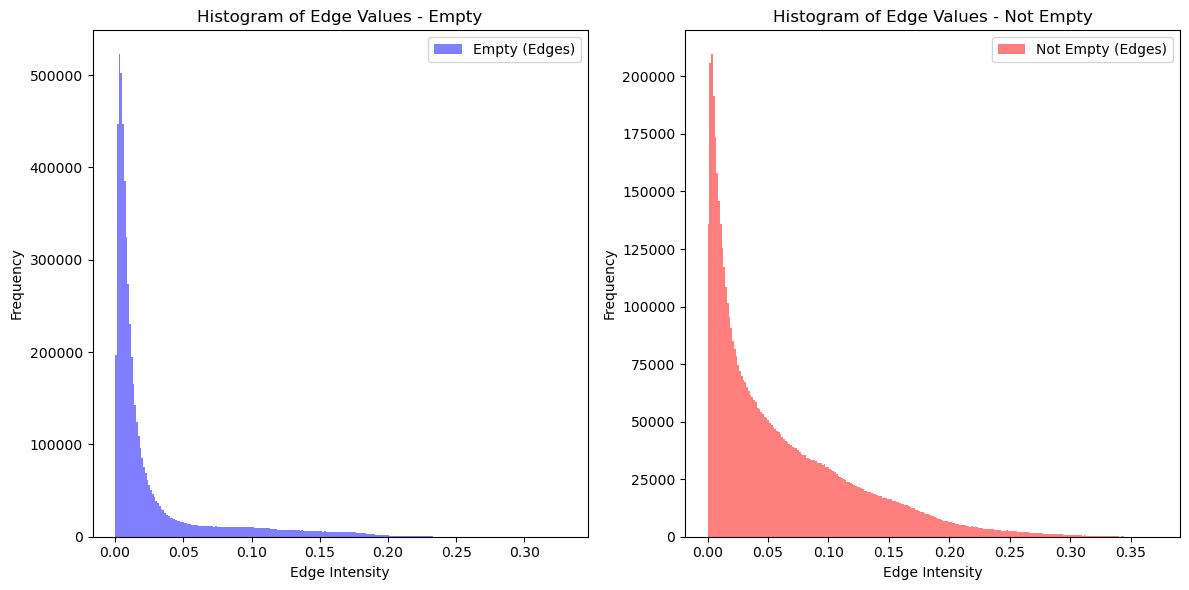

In [28]:
from skimage import io, color, filters

# Function to load and convert images to grayscale
def load_and_convert_images(image_paths):
    images = []
    for img_path in image_paths:
        img = io.imread(img_path)
        gray_img = color.rgb2gray(img)
        images.append(gray_img)
    return images

# Load and convert images
empty_images_gray = load_and_convert_images(empty_images)
not_empty_images_gray = load_and_convert_images(not_empty_images)

# Function to apply Sobel edge detection
def apply_sobel_edge_detection(image):
    return filters.sobel(image)

# Apply Sobel edge detection to the grayscale images
empty_edges = [apply_sobel_edge_detection(img) for img in empty_images_gray]
not_empty_edges = [apply_sobel_edge_detection(img) for img in not_empty_images_gray]

empty_edges = [apply_sobel_edge_detection(apply_gaussian_smoothing(img)) for img in empty_images_gray]
not_empty_edges = [apply_sobel_edge_detection(apply_gaussian_smoothing(img)) for img in not_empty_images_gray]



# Plot sample edge detection results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(empty_edges[:5]):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Empty (Edges)")
    axes[0, i].axis("off")

for i, img in enumerate(not_empty_edges[:5]):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Not Empty (Edges)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# Combine edge values for all images in each category
empty_edge_values = np.concatenate([img.ravel() for img in empty_edges])
not_empty_edge_values = np.concatenate([img.ravel() for img in not_empty_edges])

# Plot histograms of edge values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(empty_edge_values, bins=256, color='blue', alpha=0.5, label='Empty (Edges)')
plt.title("Histogram of Edge Values - Empty")
plt.xlabel("Edge Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_empty_edge_values, bins=256, color='red', alpha=0.5, label='Not Empty (Edges)')
plt.title("Histogram of Edge Values - Not Empty")
plt.xlabel("Edge Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


Laplacian Edge Detection


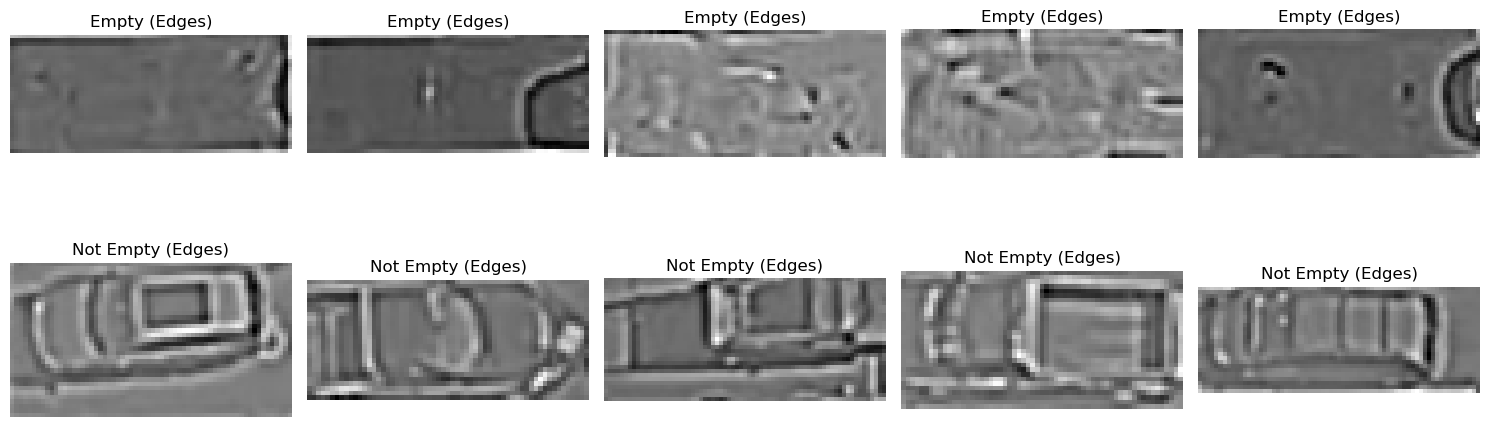

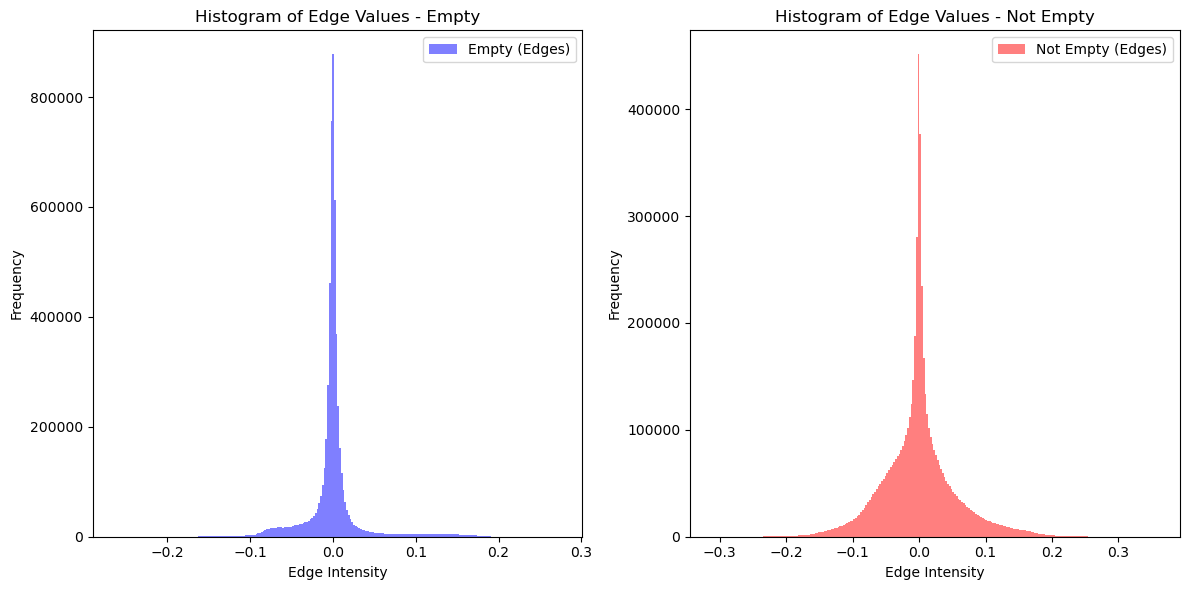

In [27]:
def apply_laplacian_edge_detection(image):
    return filters.laplace(image)

# Apply Laplacian edge detection to the grayscale images
empty_edges = [apply_laplacian_edge_detection(apply_gaussian_smoothing(img)) for img in empty_images_gray]
not_empty_edges = [apply_laplacian_edge_detection(apply_gaussian_smoothing(img)) for img in not_empty_images_gray]

# Plot sample edge detection results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(empty_edges[:5]):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Empty (Edges)")
    axes[0, i].axis("off")

for i, img in enumerate(not_empty_edges[:5]):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Not Empty (Edges)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# Combine edge values for all images in each category
empty_edge_values = np.concatenate([img.ravel() for img in empty_edges])
not_empty_edge_values = np.concatenate([img.ravel() for img in not_empty_edges])

# Plot histograms of edge values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(empty_edge_values, bins=256, color='blue', alpha=0.5, label='Empty (Edges)')
plt.title("Histogram of Edge Values - Empty")
plt.xlabel("Edge Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_empty_edge_values, bins=256, color='red', alpha=0.5, label='Not Empty (Edges)')
plt.title("Histogram of Edge Values - Not Empty")
plt.xlabel("Edge Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Function to extract HOG features
def extract_hog_features(image):
    features, hog_image = feature.hog(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return features, hog_image

In [31]:
from skimage import io, color, filters, feature

# Apply Gaussian smoothing to the grayscale images
empty_images_smooth = [apply_gaussian_smoothing(img) for img in empty_images_gray]
not_empty_images_smooth = [apply_gaussian_smoothing(img) for img in not_empty_images_gray]

# Extract HOG features from the smoothed images
empty_hog_features = [extract_hog_features(img) for img in empty_images_smooth]
not_empty_hog_features = [extract_hog_features(img) for img in not_empty_images_smooth]

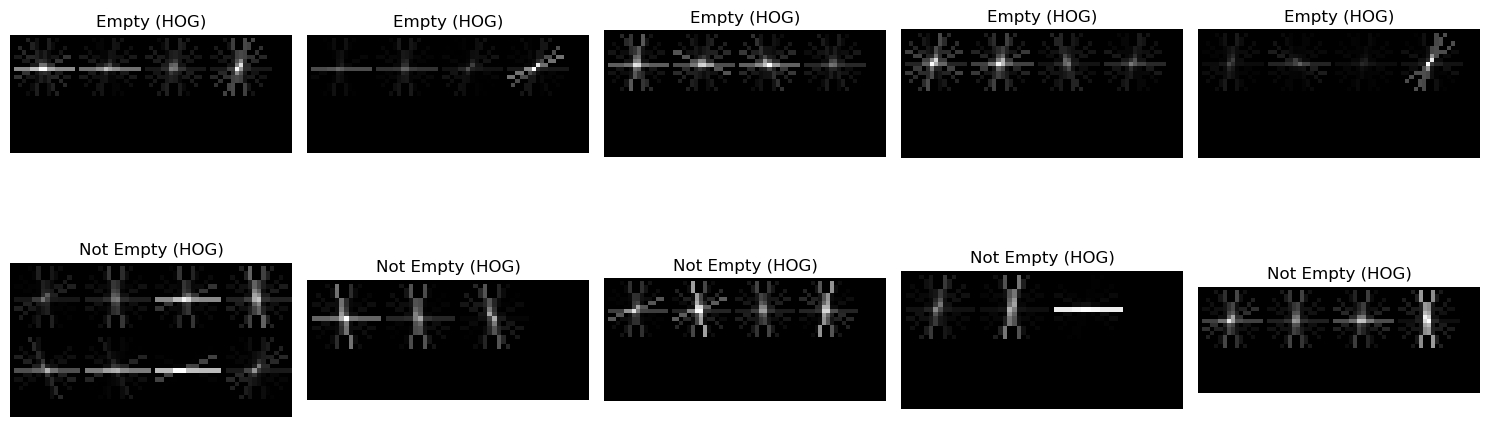

In [34]:
# Separate the HOG features and HOG images
empty_features = [f[0] for f in empty_hog_features]
not_empty_features = [f[0] for f in not_empty_hog_features]
empty_hog_images = [f[1] for f in empty_hog_features]
not_empty_hog_images = [f[1] for f in not_empty_hog_features]

# Plot sample HOG images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, img in enumerate(empty_hog_images[:5]):
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title("Empty (HOG)")
    axes[0, i].axis("off")

for i, img in enumerate(not_empty_hog_images[:5]):
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title("Not Empty (HOG)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


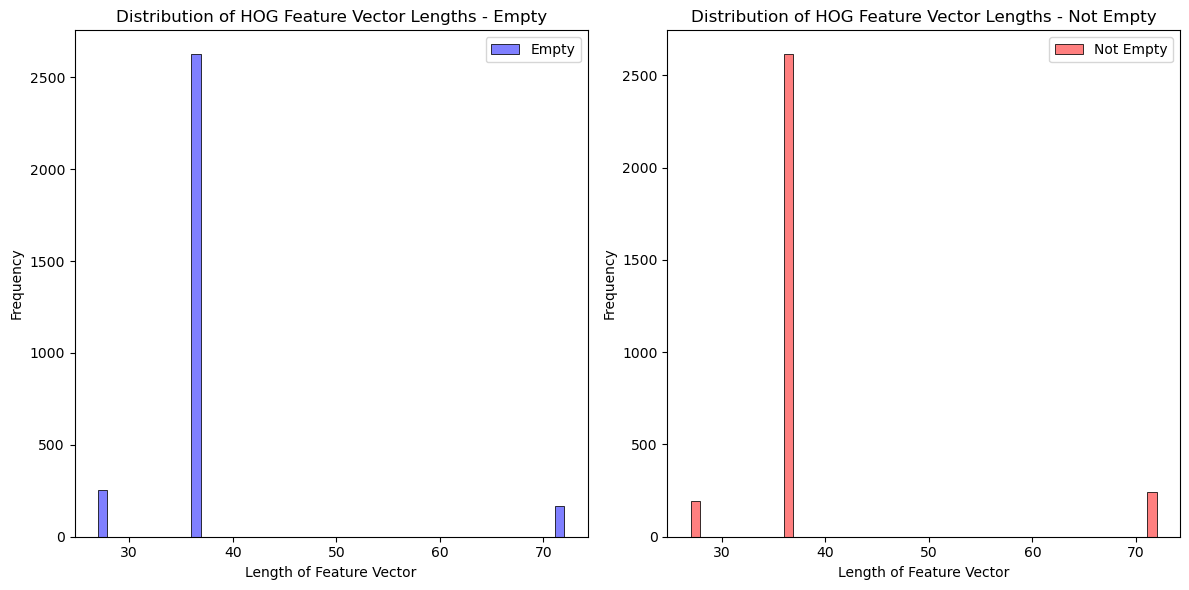

In [37]:
# Compare the number of features (length of feature vectors)
empty_features_lengths = [len(f) for f in empty_features]
not_empty_features_lengths = [len(f) for f in not_empty_features]

# Plot the distribution of feature vector lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(empty_features_lengths, bins=50, color='blue', alpha=0.5, label='Empty')
plt.title("Distribution of HOG Feature Vector Lengths - Empty")
plt.xlabel("Length of Feature Vector")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(not_empty_features_lengths, bins=50, color='red', alpha=0.5, label='Not Empty')
plt.title("Distribution of HOG Feature Vector Lengths - Not Empty")
plt.xlabel("Length of Feature Vector")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Compare summary statistics of feature vector lengths
empty_features_stats = {
    'Mean': np.mean(empty_features_lengths),
    'Median': np.median(empty_features_lengths),
    'Std Dev': np.std(empty_features_lengths)
}

not_empty_features_stats = {
    'Mean': np.mean(not_empty_features_lengths),
    'Median': np.median(not_empty_features_lengths),
    'Std Dev': np.std(not_empty_features_lengths)
}

empty_features_stats_df = pd.DataFrame(empty_features_stats, index=['Empty'])
not_empty_features_stats_df = pd.DataFrame(not_empty_features_stats, index=['Not Empty'])

features_stats_df = pd.concat([empty_features_stats_df, not_empty_features_stats_df])
print(features_stats_df)

                Mean  Median    Std Dev
Empty      37.238424    36.0   8.757842
Not Empty  38.269951    36.0  10.104578


#Building the Random Forest #
*Training the model after smoothing and applying edge detection but will not include feature extraction*


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from skimage import transform


# Function to load and convert images to grayscale
def load_and_convert_images(image_paths, size=(128, 128)):
    images = []
    for img_path in image_paths:
        img = io.imread(img_path)
        gray_img = color.rgb2gray(img)
        resized_img = transform.resize(gray_img, size, anti_aliasing=True)
        images.append(resized_img)
    return images

# Load, convert, and resize images
empty_images_gray = load_and_convert_images(empty_images)
not_empty_images_gray = load_and_convert_images(not_empty_images)

# Function to apply Gaussian smoothing
def apply_gaussian_smoothing(image, sigma=1):
    return filters.gaussian(image, sigma=sigma)

# Apply Gaussian smoothing to the grayscale images
empty_images_smooth = [apply_gaussian_smoothing(img) for img in empty_images_gray]
not_empty_images_smooth = [apply_gaussian_smoothing(img) for img in not_empty_images_gray]

# Function to apply edge detection
def apply_edge_detection(image):
    return filters.laplace(image)

# Apply edge detection to the smoothed images
empty_images_edges = [apply_edge_detection(img) for img in empty_images_smooth]
not_empty_images_edges = [apply_edge_detection(img) for img in not_empty_images_smooth]

# Flatten images to create feature vectors
empty_features = [img.ravel() for img in empty_images_edges]
not_empty_features = [img.ravel() for img in not_empty_images_edges]

# Labels
empty_labels = [0] * len(empty_features)
not_empty_labels = [1] * len(not_empty_features)

# Combine features and labels
X = empty_features + not_empty_features
y = empty_labels + not_empty_labels



In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       651
           1       0.99      1.00      0.99       567

    accuracy                           0.99      1218
   macro avg       0.99      0.99      0.99      1218
weighted avg       0.99      0.99      0.99      1218



Confusion Matrix:


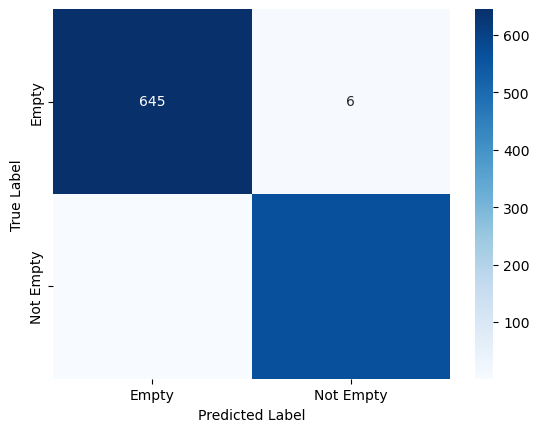

Accuracy Score:
0.9942528735632183


In [44]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Empty', 'Not Empty'], yticklabels=['Empty', 'Not Empty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

In [45]:
!pip install opencv-python-headless

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.2/38.8 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.8 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.7/38.8 MB 10.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/38.8 MB 16.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.7/38.8 MB 18.9 MB/s eta 0:00:02
   ------ --------------------------------- 6.2/38.8 MB 21.0 MB/s eta 0:00:02
   ------- -------------------------------- 7.7/38.8 MB 22.2 MB/s eta 0:00:02
   --------- ------------------------------ 9.2/38.8 MB 23.5 MB/s eta 0:00:02
   ----------- ---------------------------- 10.7/38.8 MB 31.1 MB/s eta 0:00:01
   ------------ --------------------------- 12.1/38.8 MB 32.8 MB/s eta 0:00:01
   -------------- ------------------------- 13.6/38.8 MB 31.2 MB/s eta 0:

In [46]:
import cv2


In [53]:
def count_frames(video_path):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return 0
    
    # Get the frame count
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Release the video object
    video.release()
    
    return frame_count

video_path1 = 'parking_1920_1080.mp4'  #Path to video 'parking_1920_1080.mp4'
video_path2 = 'parking_crop.mp4' #Path to video 'parking_crop.mp4'
total_frames1 = count_frames(video_path1)
total_frames2 = count_frames(video_path2)
print(f"Total number of frames for 'parking_1920_1080.mp4': {total_frames1}")
print(f"Total number of frames for 'parking_crop.mp4': {total_frames2}")

Total number of frames for 'parking_1920_1080.mp4': 849
Total number of frames for 'parking_crop.mp4': 849


In [57]:
#Export and save all the frames in a folder

def export_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    frame_count = 0
    while True:
        # Read a frame from the video
        ret, frame = video.read()
        
        # If the frame was not read successfully, break the loop
        if not ret:
            break
        
        # Save the frame as an image
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        
        frame_count += 1
    
    # Release the video object
    video.release()
    print(f"Exported {frame_count} frames to {output_folder}")

video_path = 'parking_1920_1080.mp4' #Path to the video parking_1920_1080.mp4
output_folder = 'project-cv' #path to create a new folder containing all video frames
export_frames(video_path, output_folder)

Exported 849 frames to project-cv


In [59]:
#Same for the video parking_crop.mp4

video_path2 = 'parking_crop.mp4' #Path to video parking_crop.mp4
output_folder2 = 'parking_crop.mp4-frames' #path to create a new folder containing all video frames
export_frames(video_path2, output_folder2)

Exported 849 frames to parking_crop.mp4-frames


Frame shape: (452, 380, 3)
Mask shape: (453, 381)


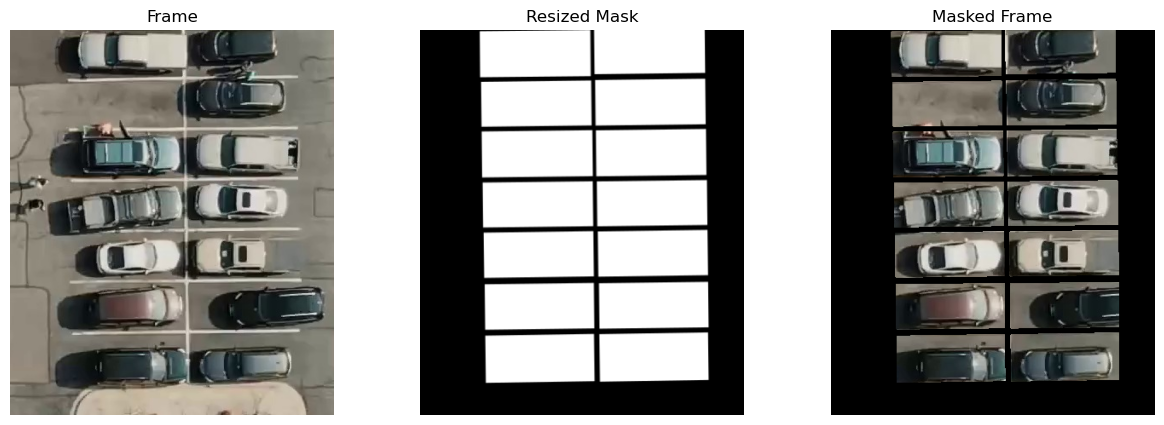

In [67]:
import os
import pandas as pd

# Load the frame and the mask
frame_path = 'parking_crop.mp4-frames/frame_0000.jpg' #Path to a sprecific frame to apply the mask in your system
mask_path = 'mask_crop.png' #Path to the mask

frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

# Resize the mask to match the frame dimensions
resized_mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

# Check the shapes of the loaded images
print(f"Frame shape: {frame.shape}")
print(f"Mask shape: {mask.shape}")

# Convert mask to binary
_, binary_mask = cv2.threshold(resized_mask, 127, 255, cv2.THRESH_BINARY)

# Create a masked frame using bitwise operations
masked_frame = cv2.bitwise_and(frame, frame, mask=binary_mask)

# Display the frame, resized mask, and masked frame
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
axs[0].set_title('Frame')
axs[0].axis('off')

axs[1].imshow(resized_mask, cmap='gray')
axs[1].set_title('Resized Mask')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(masked_frame, cv2.COLOR_BGR2RGB))
axs[2].set_title('Masked Frame')
axs[2].axis('off')

plt.show()

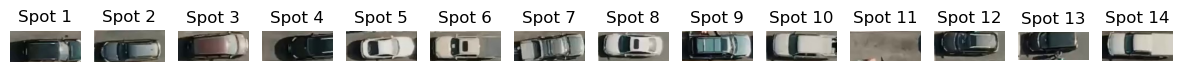

In [68]:
#Display each parking spot separetely from a especific frame. In this case "frame_0000.jpg"

# Load the frame and the mask
frame_path = 'parking_crop.mp4-frames/frame_0000.jpg' #Path to a sprecific frame to apply the mask in your system
mask_path = 'mask_crop.png' #Path to the mask

frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

# Resize the mask to match the frame dimensions
resized_mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

# Convert mask to binary
_, binary_mask = cv2.threshold(resized_mask, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store each parking spot region
parking_spots = []

# Extract regions for each parking spot
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    parking_spot = frame[y:y+h, x:x+w]
    parking_spots.append(parking_spot)

# Display the parking spots
fig, axs = plt.subplots(1, len(parking_spots), figsize=(15, 5))

for idx, spot in enumerate(parking_spots):
    axs[idx].imshow(cv2.cvtColor(spot, cv2.COLOR_BGR2RGB))
    axs[idx].set_title(f'Spot {idx+1}')
    axs[idx].axis('off')

plt.show()


In [70]:
#Iterate over all the frames in the folder of frames (created before) and do the same proces of splitting by spots. Save all spots in an list. Convert the list into a np array
#

# Define the paths
frames_folder = 'parking_crop.mp4-frames/' #Path to the folder of all frames in your system
mask_path = 'mask_crop.png' #Path to the mask
output_file = 'output1' #Path for the new file creation, in case you want/need

# Load the mask
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
if mask is None:
    raise ValueError(f"Mask image not found or could not be loaded at {mask_path}")

all_parking_spots = []

# Process each frame in the folder
for frame_filename in sorted(os.listdir(frames_folder)):
    if frame_filename.endswith('.jpg'):
        # Load the frame
        frame_path = os.path.join(frames_folder, frame_filename)
        frame = cv2.imread(frame_path)
        
        if frame is None:
            print(f"Frame {frame_path} could not be loaded. Skipping.")
            continue
        
        # Ensure the mask fits the frame
        mask_resized = cv2.resize(mask, (frame.shape[1], frame.shape[0]))
        
        # Extract parking spots
        parking_spots = []
        contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            spot = frame[y:y+h, x:x+w]
            parking_spots.append(spot)
        
        # Append parking spots for the current frame to the main list
        all_parking_spots.append(parking_spots)

# Convert the list to a numpy array for easy handling
all_parking_spots_array = np.array(all_parking_spots, dtype=object)


# Save the array to a file
np.save(output_file, all_parking_spots_array)
print(f"Parking spots saved to {output_file}")


Parking spots saved to output1


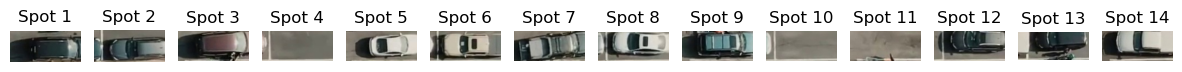

In [72]:
#Display each parking spot separetely from a especific frame. In this case "frame_0000.jpg"

# Load the frame and the mask
frame_path2 = 'parking_1920_1080.mp4-frames/frame_0000.jpg' #Path to a sprecific frame to apply the mask in your system
mask_path2 = 'mask_1920_1080' #Path to the mask

frame2 = cv2.imread(frame_path2)
mask2 = cv2.imread(mask_path2, cv2.IMREAD_UNCHANGED)

# Resize the mask to match the frame dimensions
resized_mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

# Convert mask to binary
_, binary_mask = cv2.threshold(resized_mask, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store each parking spot region
parking_spots = []

# Extract regions for each parking spot
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    parking_spot = frame[y:y+h, x:x+w]
    parking_spots.append(parking_spot)

# Display the parking spots
fig, axs = plt.subplots(1, len(parking_spots), figsize=(15, 5))

for idx, spot in enumerate(parking_spots):
    axs[idx].imshow(cv2.cvtColor(spot, cv2.COLOR_BGR2RGB))
    axs[idx].set_title(f'Spot {idx+1}')
    axs[idx].axis('off')

plt.show()


In [103]:


#Iterate over all the frames in the folder of frames (created before) and do the same proces of splitting by spots. Save all spots in an list. Convert the list into a np array
#

# Define the paths
frames_folder = 'parking_1920_1080.mp4-frames/' #Path to the folder of all frames in your system
mask_path = 'mask_1920_1080.png' #Path to the mask
output_file = '...' #Path for the new file creation, in case you want/need

# Load the mask
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
if mask is None:
    raise ValueError(f"Mask image not found or could not be loaded at {mask_path}")

all_parking_spots2 = []

# Process each frame in the folder
for frame_filename in sorted(os.listdir(frames_folder)):
    if frame_filename.endswith('.jpg'):
        # Load the frame
        frame_path = os.path.join(frames_folder, frame_filename)
        frame = cv2.imread(frame_path)
        
        if frame is None:
            print(f"Frame {frame_path} could not be loaded. Skipping.")
            continue
        
        # Ensure the mask fits the frame
        mask_resized = cv2.resize(mask, (frame.shape[1], frame.shape[0]))
        
        # Extract parking spots
        parking_spots = []
        contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            spot = frame[y:y+h, x:x+w]
            parking_spots.append(spot)
        
        # Append parking spots for the current frame to the main list
        all_parking_spots2.append(parking_spots)

# Convert the list to a numpy array for easy handling
all_parking_spots_array2 = np.array(all_parking_spots2, dtype=object)


# Save the array to a file
np.save(output_file, all_parking_spots_array2)
print(f"Parking spots saved to {output_file}")



Parking spots saved to ...


In [75]:
# Number of frames and spots per frame
total_frames = len(all_parking_spots_array)
spots_per_frame = len(all_parking_spots_array[0])

# Sample spot from the first frame
sample_spot = all_parking_spots_array[0][0]  # First spot from the first frame

(total_frames, spots_per_frame, sample_spot.shape)

(849, 14, (60, 131, 3))

In [104]:
# Number of frames and spots per frame
total_frames2 = len(all_parking_spots_array2)
spots_per_frame2 = len(all_parking_spots_array2[0])

# Sample spot from the first frame
sample_spot2 = all_parking_spots_array2[0][0]  # First spot from the first frame

(total_frames2, spots_per_frame2, sample_spot2.shape)

(849, 396, (28, 68, 3))

In [ ]:
# Applying smoothing to the array
all_parking_spots_array = np.load(output_file, allow_pickle=True)

def apply_gaussian_smoothing(image, sigma=1):
    return filters.gaussian(image, sigma=sigma, multichannel=True)

def apply_edge_detection(image):
    gray_image = color.rgb2gray(image)
    edges = filters.laplace(gray_image)
    return edges

In [106]:
# Apply smoothing and edge detection
processed_parking_spots = []

for frame_parking_spots in all_parking_spots_array:
    processed_frame_parking_spots = []
    for spot in frame_parking_spots:
        # Apply Gaussian smoothing
        spot_smooth = apply_gaussian_smoothing(spot)
        # Apply edge detection
        spot_edges = apply_edge_detection(spot_smooth)
        processed_frame_parking_spots.append(spot_edges)
    processed_parking_spots.append(processed_frame_parking_spots)

# Convert the processed list to a numpy array for easy handling
processed_parking_spots_array = np.array(processed_parking_spots, dtype=object)


In [107]:
# Apply smoothing and edge detection to the second array
processed_parking_spots2 = []

for frame_parking_spots in all_parking_spots_array2:
    processed_frame_parking_spots = []
    for spot in frame_parking_spots:
        # Apply Gaussian smoothing
        spot_smooth = apply_gaussian_smoothing(spot)
        # Apply edge detection
        spot_edges = apply_edge_detection(spot_smooth)
        processed_frame_parking_spots.append(spot_edges)
    processed_parking_spots2.append(processed_frame_parking_spots)

# Convert the processed list to a numpy array for easy handling
processed_parking_spots_array2 = np.array(processed_parking_spots2, dtype=object)

In [110]:
from skimage.transform import resize
# Define the target shape for resizing  
target_shape = (64, 64)

# Function to resize and flatten the processed parking spots
def resize_and_flatten_parking_spots(parking_spots_array, target_shape):
    resized_flattened_parking_spots = []
    for frame_parking_spots in parking_spots_array:
        for spot in frame_parking_spots:
            # Resize the image to the target shape
            resized_spot = resize(spot, target_shape, anti_aliasing=True)
            # Flatten the resized image
            resized_flattened_parking_spots.append(resized_spot.ravel())
    return np.array(resized_flattened_parking_spots)

# Resize and flatten the processed parking spots arrays
X_test1 = resize_and_flatten_parking_spots(processed_parking_spots_array, target_shape)
X_test2 = resize_and_flatten_parking_spots(processed_parking_spots_array2, target_shape)



# Predict if the frames are empty or not
y_pred1 = clf.predict(X_test1)
y_pred2 = clf.predict(X_test2)

# Print predictions
print(f"Predictions for first array: {y_pred1}")
print(f"Predictions for second array: {y_pred2}")


MemoryError: Unable to allocate 96.0 KiB for an array with shape (64, 64, 3) and data type float64